# Group 12: Predicting Patient Mortality after Heart Failure

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency

# For K-NN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# For Decision Tree
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

- About 1/4 of all deaths in the U.S. are heart disease related. 
- Heart disease is the leading cause of death in the U.S.

Source: https://www.cdc.gov/heartdisease/facts.htm

![title](heartImage.jpg)

Source: https://www.fi.edu/heart/structure-heart

#### Dataset Description

In [ ]:
dataFeatures = pd.read_csv("DataExplanation.csv")
dataFeatures

,Feature,Explanation,Measurement,Range
0,Age,Age of the patient,Years,"[40,..., 95]"
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,"0, 1"
2,Creatinine phosphokinase,Level of the CPK enzyme in the blood,mcg/L,"[23,..., 7861]"
3,Diabetes,If the patient has diabetes,Boolean,"0, 1"
4,Ejection fraction,Percentage of blood leaving the heart from the...,Percentage,"[14,..., 80]"
5,High blood pressure,If a patient has hypertension,Boolean,"0, 1"
6,Platelets,Platelets in the blood,kiloplatelets/mL,"[25.01,..., 850.00]"
7,Serum creatinine,Level of creatinine in the blood,mg/dL,"[0.50,..., 9.40]"
8,Serum sodium,Level of sodium in the blood,mEq/L,"[114,..., 148]"
9,Sex,Woman or man,Binary,"0, 1"


In [ ]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
dataset.shape

(299, 13)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Exploratory Data Analysis

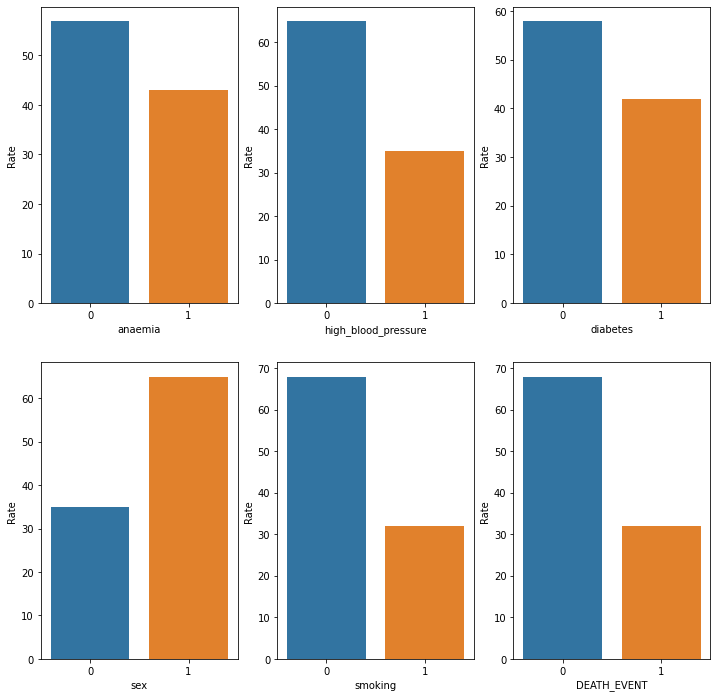

In [ ]:
# Lets look at our binary data
categorical_data = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'DEATH_EVENT']

count = 1

plt.figure(figsize = (12, 12))

for i in categorical_data:
        
    plot = round((dataset[i].value_counts())/
                    (len(dataset[i])) * 100)
    
    plt.subplot(2, 3, count)
    ax = sns.barplot(x = plot.index, y = plot.values, order = plot.sort_index().index)
    plt.xlabel(i)
    plt.ylabel('Rate')

    count += 1
plt.show()

- Over 50% of individuals in the data set have anaemia 
- Over 60% have high blood pressure 
- Almost 60% have diabetes 
- Over 60% of individuals in the dataset are male. About 35% are female
- Over 65% are smokers
- Over 65% of the individual in the data set did not passed way 

<AxesSubplot:xlabel='sex'>

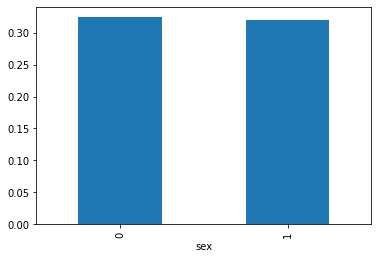

In [ ]:
dataset.groupby('sex')['DEATH_EVENT'].mean().plot.bar()

<AxesSubplot:xlabel='sex'>

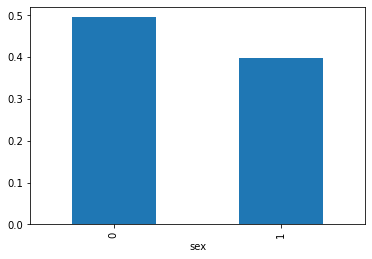

In [ ]:
dataset.groupby('sex')['anaemia'].mean().plot.bar()

<AxesSubplot:xlabel='sex'>

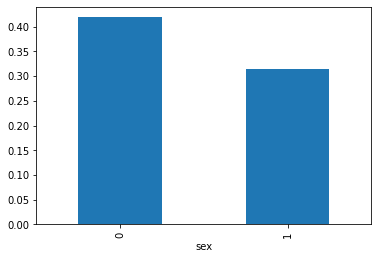

In [ ]:
dataset.groupby('sex')['high_blood_pressure'].mean().plot.bar()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='ejection_fraction', ylabel='age'>,
        <AxesSubplot:xlabel='serum_creatinine', ylabel='age'>,
        <AxesSubplot:xlabel='platelets', ylabel='age'>,
        <AxesSubplot:xlabel='serum_sodium', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='ejection_fraction'>,
        <AxesSubplot:xlabel='ejection_fraction', ylabel='ejection_fraction'>,
        <AxesSubplot:xlabel='serum_creatinine', ylabel='ejection_fraction'>,
        <AxesSubplot:xlabel='platelets', ylabel='ejection_fraction'>,
        <AxesSubplot:xlabel='serum_sodium', ylabel='ejection_fraction'>],
       [<AxesSubplot:xlabel='age', ylabel='serum_creatinine'>,
        <AxesSubplot:xlabel='ejection_fraction', ylabel='serum_creatinine'>,
        <AxesSubplot:xlabel='serum_creatinine', ylabel='serum_creatinine'>,
        <AxesSubplot:xlabel='platelets', ylabel='serum_creatinine'>,
        <AxesSubplot:xlabel='serum_sodium', ylabel='serum_c

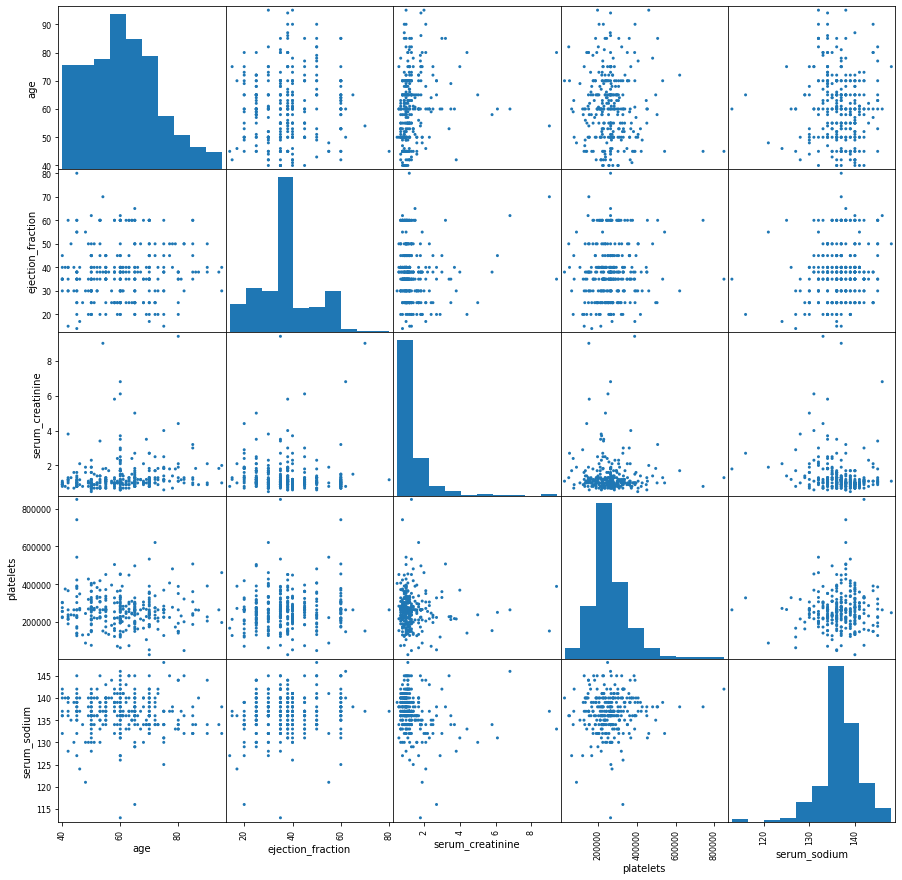

In [ ]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(15,15))
scatter_matrix(dataset[['age', 'ejection_fraction', 'serum_creatinine', 'platelets', 'serum_sodium']], alpha=1, ax=ax)

From the visualizations above we can see that the data is relatively skewed. Some of the data also seems to have a linear relation while on others the data is more clustered.

<AxesSubplot:>

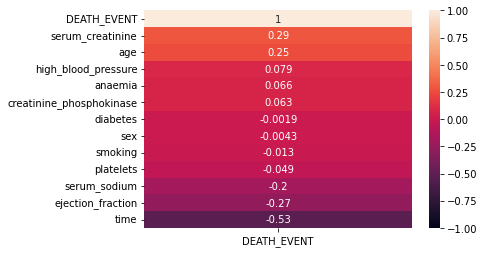

In [ ]:
# Create a heatmap of the correlation to check which values in particular would be of interest for us later for linear regression analysis of "DEATH_EVENT".
# sns.heatmap(dataset.corr(), vmin = -1, vmax = 1)

# Because we're only interested in how the independent variables correlate with our dependent variable "DEATH_EVENT", we isolate the heatmap to only check correlation
# of "DEATH_EVENT" with everything else (while also simplifying the heatmap).
sns.heatmap(dataset.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending = False), vmin= -1, vmax = 1, annot = True)

Only 5 of our independent variables (x), "serum_creatinine",&nbsp;"age",&nbsp;"serum_sodium",&nbsp;"ejection_fraction",&nbsp;and&nbsp;"time", have a correlation &gt;= 0.2; Because a +/- 0.20 correlation could be considered positively/negatively weak as is, we choose to omit the other variables of the data because their correlation with dependent variable (y) "DEATH_EVENT" is very weak.

For the sake of data exploration, and to check if there's a dependent relationship between the aforementioned variables of interest, we perform a chi square test on these 5 variables to confirm that DEATH_EVENT is dependent.

In [ ]:
# For the sake of data exploration, and to check if there is a dependent relationship between the variables of interest, we perform a chi square test on our 5 most
# correlated independent variables ("serum_creatinine", "age", "serum_sodium", "ejection_fraction", and "time") with our dependent variable of interest ("DEATH_EVENT"). 
obs = pd.crosstab(dataset['DEATH_EVENT'], dataset['serum_creatinine'])
stat, p, df, expected = chi2_contingency(obs)

# interpret p-value
a = 0.05
print("p = ", p)
if p <= a:
    print('Dependent, reject H0')
else:
    print('Independent, fail to reject H0')
    
obs = pd.crosstab(dataset['DEATH_EVENT'], dataset['age'])
stat, p, df, expected = chi2_contingency(obs)
print("p = ", p)
if p <= a:
    print('Dependent, reject H0')
else:
    print('Independent, fail to reject H0')

obs = pd.crosstab(dataset['DEATH_EVENT'], dataset['serum_sodium'])
stat, p, df, expected = chi2_contingency(obs)
print("p = ", p)
if p <= a:
    print('Dependent, reject H0')
else:
    print('Independent, fail to reject H0')

obs = pd.crosstab(dataset['DEATH_EVENT'], dataset['ejection_fraction'])
stat, p, df, expected = chi2_contingency(obs)
print("p = ", p)
if p <= a:
    print('Dependent, reject H0')
else:
    print('Independent, fail to reject H0')
    
obs = pd.crosstab(dataset['DEATH_EVENT'], dataset['time'])
stat, p, df, expected = chi2_contingency(obs)
print("p = ", p)
if p <= a:
    print('Dependent, reject H0')
else:
    print('Independent, fail to reject H0')

p =  3.1452364264229703e-06
Dependent, reject H0
p =  0.015227406432460549
Dependent, reject H0
p =  0.009600557349298953
Dependent, reject H0
p =  6.459327810543188e-08
Dependent, reject H0
p =  6.590460363385011e-07
Dependent, reject H0


As the output shows, the p-value for each test is statistically significant and thus we can conclude that "DEATH_EVENT" is truly dependent upon the 5 variables we were interested in after checking correlation.

### Linear Regression:

Using the 5 independent variables of interest, we create our training and test data sets using the first 80% and remaining 20% of the total data.

In [ ]:
# 80% of data as training set.
data_train = dataset.loc[:239].copy()
# Remaining 20% of data as the test set.
data_test = dataset.loc[240:].copy()

predictors = ["age", "ejection_fraction", "serum_creatinine", "serum_sodium", "time"]
target = "DEATH_EVENT"
# Create the regression model using the dependent variables that had a positive or negative correlation above 0.2 (anything lower felt insignificant to evaluate).
model = LinearRegression()
model.fit(X = data_train[predictors].values, y = data_train[target])

# Print the regression coefficients of model
print("Regression coefficients: ", model.coef_)

# Use the test data.
model.predict(
    X = data_test[predictors].values
)

# Print the R^2 / coefficient of determination for the data
print("R^2 / Coefficient of Determination: ", model.score(data_train[predictors].values, data_train[target]))
# As we can see with the output, the coefficient of determination is approximately 0.383; In other words, 38.3% of the variability in our dependent variable "DEATH_EVENT"
# can be accounted for by our independent variables of interest, "age", "ejection_fraction", "serum_creatinine", "serum_sodium", and "time."

Regression coefficients:  [ 0.00624112 -0.00967127  0.0883354  -0.00752034 -0.00336217]
R^2 / Coefficient of Determination:  0.38331592923406854


### K-Nearest Neighbors:

As shown by our R^2 results, we can conclude that in terms of accuracy, our linear regression model accounts for about 38.3% of the variance and in general isn't something one would consider accurate for predictions. In this case, the next step would be to try using a K-Nearest Neighbors algorithm to predict the likelihood of death in patients given our variables of interest.

Predictions (0 being survived, 1 being died):
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0] 



[Text(0, 0.5, 'Lived'), Text(0, 1.5, 'Died')]

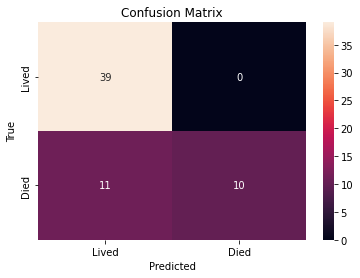

In [ ]:
# Focus on the variables of interest that we determined earlier.
X = dataset.iloc[:, [0, 4, 7, 8, 11]].values
y = dataset.iloc[:, 12].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 16)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Predictions (0 being survived, 1 being died):\n", y_pred, "\n")

ax = plt.subplot()
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Lived', 'Died'])
ax.yaxis.set_ticklabels(['Lived', 'Died'])

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        39
           1       1.00      0.48      0.65        21

    accuracy                           0.82        60
   macro avg       0.89      0.74      0.76        60
weighted avg       0.86      0.82      0.80        60



Text(0, 0.5, 'Mean Error')

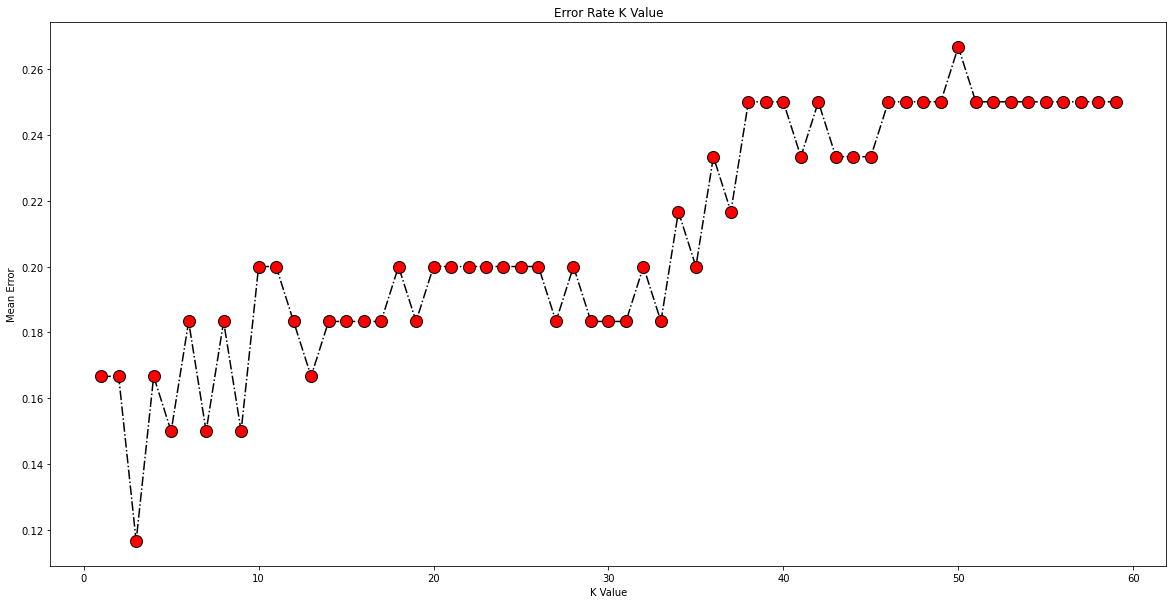

In [ ]:
print(classification_report(y_test, y_pred))

error = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20, 10))
plt.plot(range(1, 60), error, color = 'black', linestyle = 'dashdot', marker = 'o',
         markerfacecolor = 'red', markersize = 12)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Decision Tree:

While K-Nearest Neighbors shows a significant improvement over linear regression at predicting death in patients, moving over to a decision tree which performs better at making predictions for categorical variables one would expect similar predictions at the least and theoretically better predictions otherwise.

[0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0]
Accuracy: 0.8333333333333334


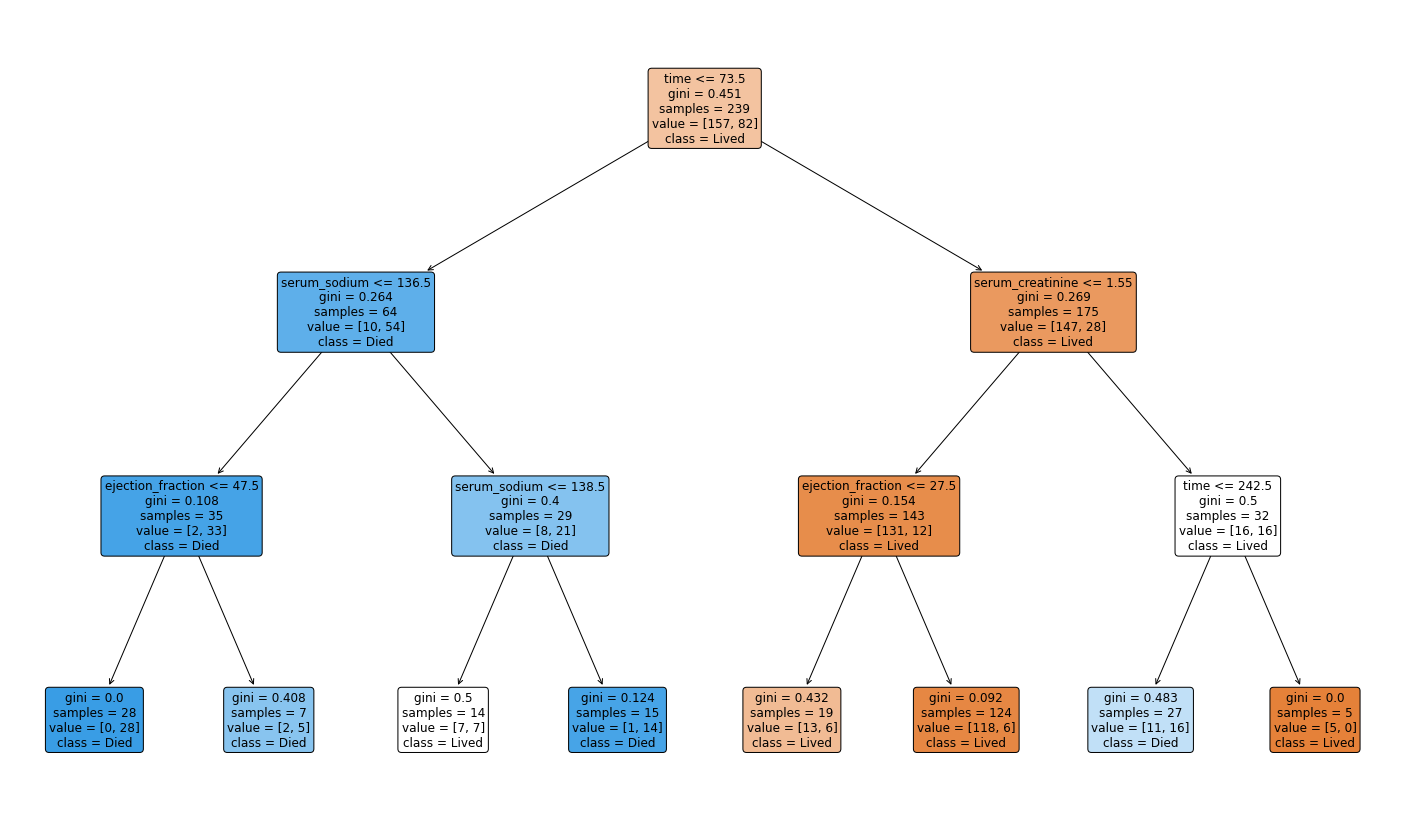

In [ ]:
# Setting X to contain exclusively our independent variables of interest and y to be our dependent DEATH variable.
X = dataset[predictors]
y = dataset[target]

# Set the X / y train and test values to be 80% and 20% of the data respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Use the DecisionTreeClassifier function from sklearn's trees and fit and predict our decision tree somewhat similarly to our linear regression.
clf = DecisionTreeClassifier(criterion="gini", max_depth = 3)
clf = clf.fit(X_train,y_train)
# Predict our test value.
y_pred = clf.predict(X_test)

print(y_pred)
# Print out the accuracy of our prediction using the accuracy_score function from metrics in sklearn.
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Plot the decision tree itself.
plt.figure(figsize=(25, 15))
graph = tree.plot_tree(clf, feature_names = predictors, filled = True, fontsize = 12, rounded = True, class_names = ["Lived", "Died"])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdc644b6-5f00-47b3-ac55-c9184de1a536' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>